# unused code

##

## API full set of data with:
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score
- PLAYERS

In [2]:
#https://lol.fandom.com/wiki/Help:Leaguepedia_API
""" 
    This is the website I used to figure out how to query API from Leaguepedia (storing all match statistics)
"""
import mwclient

#This is the LeaguePedia website that stores all match and team statistics
site = mwclient.Site('lol.fandom.com', path='/')


"""
    I searched for a quicker way to iterate for loops because it took too long to run
"""
#https://github.com/tqdm/tqdm 
from tqdm.notebook import tqdm

#pre-set the leagues I want to look at - all those that will qualify to worlds
leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

#create an empty list to store my dataset
results = []

#for loop to create my data base of match stats
for league in tqdm(leagues):
    off=0
    
    #while loop to retrive data thruogh API
    while True:
        #API query
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="500",
                            
                            #retrive tables
                            tables = "ScoreboardGames=SG, ScoreboardPlayers=SP,Tournaments=T, Leagues=L",
                            
                            #retrive fields as columns
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SP.Link,\
                                    SG.DateTime_UTC, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score", 
                            
                            #set condition (only include specified leagues)
                            where = 'L.League_Short = "'+league+'"',
                            
                            #similar to vlookup in the web pages
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League, SP.MatchId=SG.MatchId")
        
        #add to database
        results += response["cargoquery"] 
        
        #speed
        off=off+500
        if(len(response["cargoquery"])<500): break
        

  0%|          | 0/1 [00:00<?, ?it/s]


KeyboardInterrupt



## Import df_Scoreboard

In [ ]:
import pandas as pd
df_Scoreboard = pd.DataFrame([ a['title'] for a in results ])
df_Scoreboard = df_Scoreboard.drop("DateTime UTC__precision", axis=1)
df_Scoreboard.sort_values("DateTime UTC")
df_Scoreboard.head()
#df_Scoreboard.to_csv("Scoreboard.csv")

## API LCK set of data with PLAYERS team, ID, age, nationality, birthday

In [ ]:
#https://lol.fandom.com/wiki/Help:Leaguepedia_API
""" 
    This is the website I used to figure out how to query API from Leaguepedia (storing all match statistics)
"""
import mwclient

#This is the LeaguePedia website that stores all match and team statistics
site = mwclient.Site('lol.fandom.com', path='/')


"""
    I searched for a quicker way to iterate for loops because it took too long to run
"""
#https://github.com/tqdm/tqdm 
from tqdm.notebook import tqdm

#pre-set the leagues I want to look at - all those that will qualify to worlds
#leagues=['LCS','LEC','LCK','LPL','CBLOL','LJL','LLA','PCS','VCS']
leagues=['LCK']

#create an empty list to store my dataset
results = []

#for loop to create my data base of match stats
for league in tqdm(leagues):
    off=0
    
    #while loop to retrive data thruogh API
    while True:
        #API query
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            #retrive tables
                            tables = "Teams=T, Players=P",
                            
                            #retrive fields as columns
                            fields="P.Team=Team, P.ID=ID, P.Nationality, P.Country,P.Birthdate,\
                                    T.Region=Region, T.Short", 
                            
                            #set condition 
                            #where = 'T.Name = P.Team',
                            
                            #similar to vlookup in the web pages
                            join_on = "T.Name = P.Team")
        
        #add to database
        results += response["cargoquery"] 
        
        #speed
        off=off+500
        if(len(response["cargoquery"])<500): break

        
        
import pandas as pd
df_Players = pd.DataFrame([ a['title'] for a in results ])

#drop birthdate precision
df_Players = df_Players.drop("Birthdate__precision", axis=1)

df_Players.head()
#df_Players.to_csv("Players.csv")

In [ ]:
df_stats = df_Scoreboard.merge(df_Players, left_on = 'Team1', right_on = 'Team', how = 'left')
df_stats.head()
df_stats.to_csv("Merged.csv")

In [ ]:
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################
#####################################################################################################################################################

# Used Code

## 

## API full set of data with: (much faster)
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score

In [ ]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:
    
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "ScoreboardGames=SG,Tournaments=T, Leagues=L",
                            
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SG.DateTime_UTC=Date, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score,SG.WinTeam", 
                            
                            where = 'L.League_Short = "'+league+'"',
                            
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League")
    
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

# Convert to Panda DataFrame and Clean Data

In [ ]:
#import pandas package
import pandas as pd

#convert to dataframe from dictionary
df_Scoreboard = pd.DataFrame([ a['title'] for a in results ])
#df_Scoreboard = pd.read_csv("Scoreboard.csv")

#drop unused column
df_Scoreboard = df_Scoreboard.drop("Date__precision", axis=1)

#sort by date
df_Scoreboard.sort_values(by = "Date",inplace=True)

#split date and time
df_Scoreboard["Date"] = pd.to_datetime(df_Scoreboard["Date"])
df_Scoreboard["Year"]= df_Scoreboard["Date"].dt.year

#convert Team 1 & 2 score as integers
df_Scoreboard = df_Scoreboard.astype({'Team1Score':'int','Team2Score':'int'})

#preview first few rows
df_Scoreboard.head()

#save as csv
df_Scoreboard.to_csv("Scoreboard.csv")

## Shortcut - Import df_Scoreboard

In [1]:
import pandas as pd
df_Scoreboard = pd.read_csv("Scoreboard.csv",index_col=0)

## Get Worlds 2011 - 2022 Winners
## API full set of data with: (much faster)
- MATCH: Tournament, Date, League, GameLength, Team1, Team2, T1 Score, T2 Score
- Tab: Quarterfinals, Semifinals, Finals

In [ ]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['WCS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:
 
        response = site.api('cargoquery',
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "ScoreboardGames=SG,Tournaments=T, Leagues=L, MatchSchedule=M",
                            
                            fields="T.Name=Tournament,\
                                    L.League_Short=League,\
                                    SG.DateTime_UTC=Date, SG.Gamelength, SG.Team1, SG.Team2, SG.Team1Score, SG.Team2Score,SG.WinTeam, M.Tab", 
                            
                            where = 'L.League_Short = "'+league+'"',
                            
                            join_on = "SG.OverviewPage=T.OverviewPage, T.League = L.League, M.OverviewPage=T.OverviewPage")
        
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

## Convert to Panda DataFrame and Clean Data

In [ ]:
#import pandas package
import pandas as pd

#convert to dataframe from dictionary
df_Scoreboard_Worlds = pd.DataFrame([ a['title'] for a in results ])

#drop unused column
df_Scoreboard_Worlds = df_Scoreboard_Worlds.drop("Date__precision", axis=1)

#sort by date
df_Scoreboard_Worlds.sort_values(by = "Date",inplace=True)

#split date and time
df_Scoreboard_Worlds["Date"] = pd.to_datetime(df_Scoreboard_Worlds["Date"])
df_Scoreboard_Worlds["Year"]= df_Scoreboard_Worlds["Date"].dt.year

#convert Team 1 & 2 score as integers
df_Scoreboard_Worlds = df_Scoreboard_Worlds.astype({'Team1Score':'int','Team2Score':'int'})

#preview first few rows
df_Scoreboard_Worlds.head()

#save as csv
df_Scoreboard_Worlds.to_csv("Scoreboard_Worlds.csv")

## Get Worlds Tournament only - dataset above contains regional finals

In [ ]:
#I want to get the winners of all the Worlds Championships only
#I can't filter from 'WCS' league because it randomly includes regional finals
#But the tournaments that begin with "Worlds" can be identified
df_Scoreboard_Worlds2 = df_Scoreboard_Worlds[df_Scoreboard_Worlds["Tournament"].str.startswith("Worlds")]

df_Scoreboard_Worlds2.head()
#df_Scoreboard_Worlds2.to_csv("Scoreboard_Worlds2.csv")

## Shortcut - Import df_Scoreboard_Worlds, df_Scoreboard_Worlds2

In [2]:
import pandas as pd
df_Scoreboard_Worlds = pd.read_csv("Scoreboard_Worlds.csv", index_col=0)
df_Scoreboard_Worlds2 = pd.read_csv("Scoreboard_Worlds2.csv", index_col=0)

## Get Winners of Finals in Worlds 

In [3]:
#define function to get winner of each match
def get_Winner(year):
    df_Scoreboard_Worlds2[df_Scoreboard_Worlds2["Year"]==year]
    return

## Graph - Top 10 Team Winners in ALL matches of Worlds

<AxesSubplot: title={'center': 'Top 10 Teams'}, xlabel='Teams', ylabel='Matches won'>

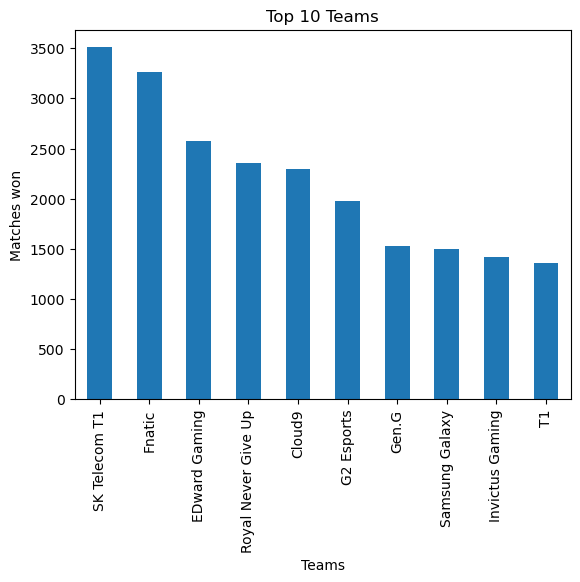

In [5]:
#who won the most matches in Worlds Championship
#most_wins = df_Scoreboard_Worlds2["WinTeam"].value_counts()

import seaborn as sns

top_10_teams = (df_Scoreboard_Worlds2['WinTeam'].value_counts()).iloc[:10]

#create bar chart of top 10 teams
top_10_teams.plot(kind='bar',title='Top 10 Teams', xlabel = "Teams", ylabel = "Matches won")

## Get list of all World Winners - filter who won most matches in Finals

In [7]:
#create function to get winner of each season/worlds 
def get_winner(year):
    finals = df_Scoreboard_Worlds2[df_Scoreboard_Worlds2["Tab"]=="Finals"]
    finals_year = finals[finals["Year"]==year]
    winner = finals_year["WinTeam"].value_counts( ).idxmax()
    return winner

get_winner(2020)

#create dictionary for Worlds Winners
years = [i for i in range(2011,2023)]

winners = []
for i in range(2011,2023):
    winners.append(get_winner(i))

dict_worlds_winners = {}
for i in range(len(years)):
    dict_worlds_winners[years[i]] = winners[i]


## Convert to Panda DataFrame and Clean Data

In [9]:
#create dataframe from dictionary
df_worlds_winners = pd.DataFrame(data = [dict_worlds_winners])
df_worlds_winners = df_worlds_winners.transpose()
df_worlds_winners.reset_index(inplace=True)
df_worlds_winners.columns = ["Year","Winner"]
df_worlds_winners.to_csv("Worlds_Winners.csv") 

## Shortcut - Import df_worlds_winners

In [10]:
import pandas as pd
df_worlds_winners = pd.read_csv("Worlds_Winners.csv",index_col=0) 

## Get All Teams Region data
## API full set of data with: (much faster)
- TEAM: Name, Region, Abbreviation 

In [ ]:
import mwclient
site = mwclient.Site('lol.fandom.com', path='/')

from tqdm.notebook import tqdm

leagues=['GPL','IWCQ','WCS','LCS','LEC','LCK','LPL','CBLOL','LCL','LJL','LLA','OPL','PCS','VCS','TCL','LMS','LST','NA LCS','EU LCS','LLN','CLS']

results = []

for league in tqdm(leagues):
    off=0
    
    while True:

        response = site.api("cargoquery",
                            offset=str(off),
                            
                            limit="max",
                            
                            tables = "Teams=T",
                            
                            fields="T.Name=Team, T.Region=Region, T.Short=Team_abbr")
                            
        results += response["cargoquery"] 
        
        off=off+500
        if(len(response["cargoquery"])<500): break

# Convert to Panda DataFrame and Clean Data

In [ ]:
import pandas as pd
df_TeamRegion = pd.DataFrame([ a['title'] for a in results ])

df_TeamRegion = df_TeamRegion.dropna()
df_TeamRegion = df_TeamRegion.drop_duplicates(subset="Team")
df_TeamRegion.head()

df_TeamRegion.to_csv("TeamRegion.csv")

## Shortcut - Import df_TeamRegion

In [35]:
import pandas as pd
df_TeamRegion = pd.read_csv("TeamRegion.csv",index_col=0)

In [12]:
df_worlds_winners2 = df_worlds_winners.merge(df_TeamRegion, left_on = "Winner", right_on = "Team", how = "left")
df_worlds_winners2 = df_worlds_winners2.drop(columns="Team")
df_worlds_winners2.to_csv("Worlds_Winners2.csv")

## Shortcut - Import df_worlds_winners2

In [32]:
df_worlds_winners2 = pd.read_csv("Worlds_Winners2.csv",index_col=0)

## Add DAMWON Gaming and DWG KIA to df_Team_Region

In [20]:
#DAMWON Gaming and DWG KIA both renamed - They are the same team...
#need to add this detail in df
df_TeamRegion2 = {"Team":"DAMWON Gaming",
                  "Region":"Korea",
                  "Team_abbr":"DK"}

df_TeamRegion3 = {"Team":"DWG KIA",
                  "Region":"Korea",
                  "Team_abbr":"DK"}

df_TeamRegion = df_TeamRegion.append(df_TeamRegion2, ignore_index=True)
df_TeamRegion = df_TeamRegion.append(df_TeamRegion3, ignore_index=True)
df_TeamRegion

C:\Users\vivia\AppData\Local\Temp\ipykernel_2288\2483763740.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TeamRegion = df_TeamRegion.append(df_TeamRegion2, ignore_index=True)
C:\Users\vivia\AppData\Local\Temp\ipykernel_2288\2483763740.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_TeamRegion = df_TeamRegion.append(df_TeamRegion3, ignore_index=True)


,Team,Region,Team_abbr
0,00 Nation,Europe,00N
1,00 Prospects,Europe,00P
2,1 Trick Ponies,North America,1TP
3,1. Berliner Esport-Club e.V.,Europe,BESC
4,100 Thieves,North America,100
...,...,...,...
2846,Zwan Gaming Colombia,Latin America,ZWN.C
2847,Zwan Gaming Mexico,Latin America,ZWN.M
2848,Zylant Esports,Latin America,ZLT
2849,DAMWON Gaming,Korea,DK


In [23]:
#repeat after adding the missing teams
df_worlds_winners2 = df_worlds_winners.merge(df_TeamRegion, left_on = "Winner", right_on = "Team", how = "left")
df_worlds_winners2 = df_worlds_winners2.drop(columns="Team")
df_worlds_winners2.to_csv("Worlds_Winners2.csv")

## Graph - Frequency of Worlds Winner : Teams 

([<matplotlib.axis.YTick at 0x1e8e3060d00>,
 [Text(0, 0, '0'), Text(0, 1, '1'), Text(0, 2, '2'), Text(0, 3, '3')])

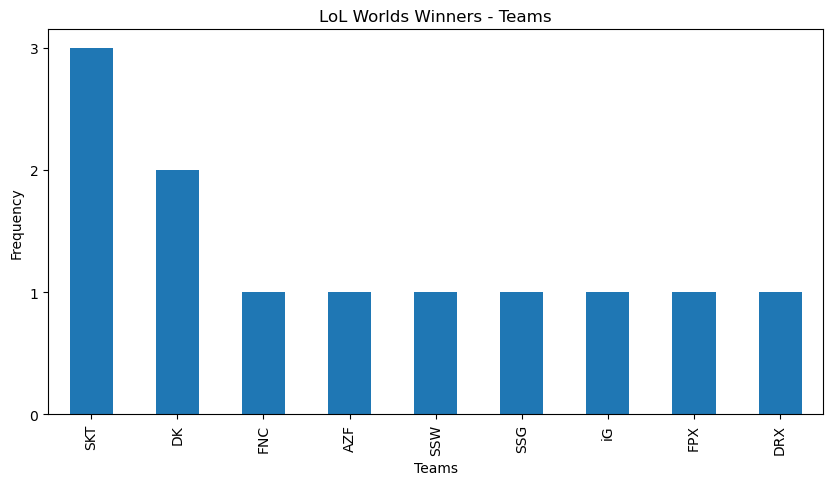

In [21]:
#Plot frequencies of team winners
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = df_worlds_winners2["Team_abbr"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="LoL Worlds Winners - Teams")
ax.set_xlabel("Teams")
ax.set_ylabel("Frequency")

import numpy as np
plt.yticks(np.arange(0, 4, 1))

## Graph - Frequency of Worlds Winner : Regions 

([<matplotlib.axis.YTick at 0x1e8e315e9a0>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9')])

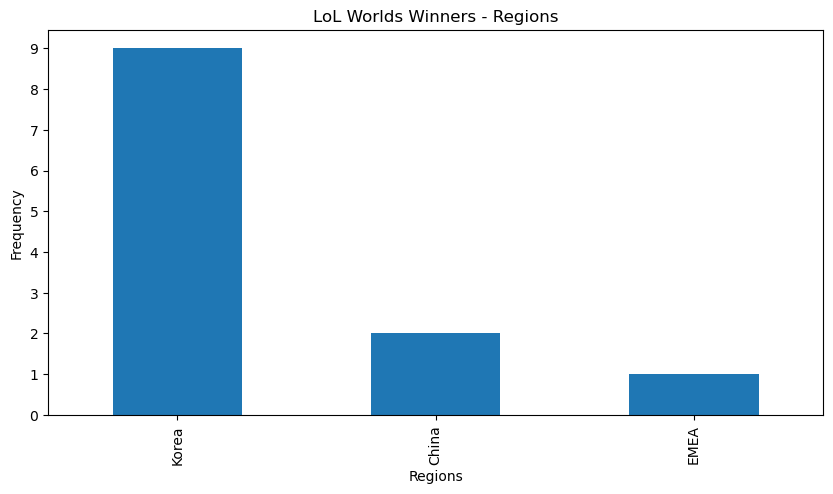

In [22]:
#Plot frequencies of region winners
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax = df_worlds_winners2["Region"].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="LoL Worlds Winners - Regions")
ax.set_xlabel("Regions")
ax.set_ylabel("Frequency")

import numpy as np
plt.yticks(np.arange(0, 10, 1))

## Get Participation of Regions
- to show that Korea participated later but won a lot more matches/worlds finals


In [26]:
#get unique regions
#df_TeamRegion["Region"].unique()

#there are 20 regions to be matched
#len(df_TeamRegion["Region"].unique())

#dictionary to match regions - from googling
dict_regions_code = {
    'Africa':'EMEA',
    'Brazil':'BR',
    'China':'CN',
    'CIS':'INT',
    'EMEA':'EMEA',
    'Europe':'EMEA',
    'International':'INT',
    'Japan':'JP',
    'Korea':'KR',
    'LAN':'INT',
    'LAS':'INT',
    'Latin America':'LAT',
    'LMS':'INT',
    'MENA':'INT',
    'North America':'NA',
    'Oceania':'PCS',
    'PCS':'PCS',
    'SEA':'PCS',
    'Turkey':'EMEA',
    'Vietnam':'VN'
}

#define function to get region code from dictionary
def get_region_code(region):
    return dict_regions_code[region]

In [27]:
#create a dictionary to match teams to regions

#SOURCE - https://www.skytowner.com/explore/converting_two_columns_into_a_dictionary_in_pandas_dataframe
dict_regions = dict(zip(df_TeamRegion["Team"], df_TeamRegion["Region"]))

#define function to get region code from dictionary
def get_region(team):
    return dict_regions[team]

## Add Region to Scoreboard - so I can show participation of regions

In [29]:
#add column for region code to Worlds Scoreboard
for index,row in df_Scoreboard_Worlds2.iterrows():
    df_Scoreboard_Worlds2["Region"] = df_Scoreboard_Worlds2["Team1"].apply(get_region)
    #!!! THis is not working because dictionary is case-sensitive
#df_Scoreboard_Worlds2.head()

KeyError: 'Epik Gamer'

In [37]:
df_team1 = df_Scoreboard_Worlds2.merge(df_TeamRegion, left_on = 'Team1', right_on = 'Team', how = 'left')
df_team1 = pd.to_csv("Merged1.csv")

AttributeError: module 'pandas' has no attribute 'to_csv'

In [ ]:
#add column for region code to Worlds Scoreboard
for index,row in df_Scoreboard_Worlds2.iterrows():
    df_Scoreboard_Worlds2["Region_code"] = df_TeamRegion["Region"].apply(get_region_code)
    
df_Scoreboard_Worlds2.head()

In [ ]:
#############################################################################################################################

In [ ]:
df_team1 = df_Scoreboard.merge(df_TeamRegion, left_on = 'Team1', right_on = 'Team', how = 'left')
df_team1.rename(columns = {'Team':'Team1','Region':'Region_T1','Team_abbr':'T1_code'}, inplace = True)
df_team1.head()
#df_team1.to_csv("Merged Team 1.csv")

In [ ]:
#create dictionary to match start and end of league season
#season dates found on Leaguepedia
dict_match_season = {
    2023:{'Start':'2022-11-11 00:00:00','End':'2023-10-01 00:00:00'},
    2022:{'Start':'2021-11-11 00:00:00','End':'2022-10-01 00:00:00'},  
    2021:{'Start':'2020-11-11 00:00:00','End':'2021-10-01 00:00:00'},  
    2020:{'Start':'2019-11-11 00:00:00','End':'2020-10-01 00:00:00'},  
    2019:{'Start':'2018-11-04 00:00:00','End':'2019-10-09 00:00:00'},
    2018:{'Start':'2017-11-05 00:00:00','End':'2018-10-08 00:00:00'},
    2017:{'Start':'2016-10-30 00:00:00','End':'2017-09-30 00:00:00'},
    2016:{'Start':'2015-10-30 00:00:00','End':'2016-09-30 00:00:00'},
    2015:{'Start':'2014-10-30 00:00:00','End':'2015-09-30 00:00:00'},
    2014:{'Start':'2013-10-30 00:00:00','End':'2014-09-30 00:00:00'},
    2013:{'Start':'2012-10-30 00:00:00','End':'2013-09-30 00:00:00'},
    2012:{'Start':'2011-10-30 00:00:00','End':'2012-09-30 00:00:00'},
}

In [ ]:
df_team1_2 = df_Scoreboard.merge(df_TeamRegion, left_on = 'Team1', right_on = 'Team', how = 'left')#\
                            #.merge(df_TeamRegion,left_on = 'Team2', right_on = 'Team', how = 'left', suffixes=("_T1","_T2"))
#df_team1_2.head()
df_team1_2.to_csv("Merged Teams.csv")

In [ ]:
#create dictionary for all match stats within the season 
dict_match_data_per_season=dict()
for date in dict_match_season:
    dict_match_data_per_season[date] = df_Scoreboard[
        (df_Scoreboard.Date>dict_match_season[date]['Start'])&
        (df_Scoreboard.Date<dict_match_season[date]['End'])]

In [ ]:
#get match data per season
df_match_data_per_season = pd.DataFrame(dict_match_data_per_season[2015])
df_match_data_per_season.head()


In [ ]:
#get leagues - without duplicates
dict_match_data_per_season[2022]["League"].unique()

In [ ]:
#because LoL changed the league names, I create a dictionary to match the old and new league names
#alias = {
dict_league_names = {
    'GPL': 'PCS', 
    'NA LCS': 'LCS', 
    'EU LCS': 'LEC', 
    'LPL': 'LPL', 
    'TCL': 'PCS', 
    'LJL': 'LJL', 
    'CBLOL': 'CBLOL',
    'LMS': 'PCS', 
    'OPL': 'OPL', 
    'CLS': 'LLA', 
    'LCK': 'LCK', 
    'LCL': 'LCL', 
    'LLN': 'LLA', 
    'VCS': 'PCS', 
    'LEC': 'LEC',
    'LLA': 'LLA', 
    'LCS': 'LCS', 
    'PCS': 'PCS',
    'LST': 'PCS'
}
list_regions = list(set([dict_league_names[name] for name in dict_league_names]))

In [ ]:
#create a dictionary for Worlds Stats 
dict_Worlds_data=dict()

#create a dictionary for Groups Data
dict_groups_data=dict()

#for all years in stats 2011 - 2022:
for year in range (2011, 2023):
    
    response = site.api('cargoquery',
                        limit="max",
                        tables = "MatchSchedule=M",
                        fields="M.Team1Final=Team1, M.Team2Final=Team2, M.Team1Score, M.Team2Score, M.Tab",
                        where = 'M.OverviewPage = "'+str(year)+' Season World Championship/Main Event"')
    
    #create dictionary for LoL Worlds Championship match stats
    dict_Worlds_data[year] = pd.DataFrame ( [ a['title'] for a in response['cargoquery'] ] )
    
    response = site.api('cargoquery',
                        limit="max",
                        tables = "TournamentGroups=T",
                        fields="T.Team, T.GroupName",
                        where = 'T.OverviewPage = "'+str(year)+' Season World Championship/Main Event"')
    
    #create dictionary for Groups Data
    dict_groups_data[year] = pd.DataFrame ( [ a['title'] for a in response['cargoquery'] ] )

In [ ]:
dict_Worlds_data

In [ ]:
def WhoWon(row):
    if row["Team1Score"]>row["Team2Score"]: return row["Team1"]
    else: return row["Team2"]

In [ ]:
df_KnockoutStage = dict() # Will contain the matches for the quarterfinals,semifinals and finals
for year in range(2017,2023):
    dict_groups_data[year]["Wins"] = 0
    df_KnockoutStage[year] = pd.DataFrame([], columns=dict_Worlds_data[year].columns)
    for index,row in dict_Worlds_data[year].iterrows():
        if (row.Tab not in ['Quarterfinals', 'Semifinals', 'Finals']):
            winner_row = dict_groups_data[year].Team == WhoWon(row)
            dict_groups_data[year].Wins[winner_row] += 1
        else:
            df_KnockoutStage[year] = df_KnockoutStage[year].append(row)
    df_KnockoutStage[year]["Winner"] = df_KnockoutStage[year].apply(WhoWon,axis=1)

In [ ]:
df_KnockoutStage[2022]

In [ ]:
df_Worlds_Winners = dict() # Will contain the matches for the quarterfinals,semifinals and finals
for year in range(2015,2023):
    dict_groups_data[year]["Wins"] = 0
    df_KnockoutStage[year] = pd.DataFrame([], columns=dict_Worlds_data[year].columns)
    for index,row in dict_Worlds_data[year].iterrows():
        if (row.Tab not in ['Quarterfinals', 'Semifinals', 'Finals']):
            winner_row = dict_groups_data[year].Team == WhoWon(row)
            dict_groups_data[year].Wins[winner_row] += 1
        else:
            df_KnockoutStage[year] = df_KnockoutStage[year].append(row)
    df_KnockoutStage[year]["Winner"] = df_KnockoutStage[year].apply(WhoWon,axis=1)

In [ ]:

##########
class CaseInsensitiveDict(dict):
    """Case-insensitive dictionary implementation."""

    def __getitem__(self, key):
        return dict.__getitem__(self, key.casefold())
